In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
bdata = sc.read_h5ad('h5ad/meninges_integrated_b_cells_tfh_tfr.h5ad')

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


In [2]:
bdata = bdata[bdata.obs['celltype'] == 'Tfh']
bdata

View of AnnData object with n_obs × n_vars = 176 × 3845
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'condition_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'keep_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities',

In [3]:
bdata.obs['celltype_condition'] = [a + '_' + b for a, b in zip(bdata.obs['celltype'], bdata.obs['condition'])]
bdata.obs['celltype_condition'] = bdata.obs['celltype_condition'].astype('category')
catorder_a = bdata.obs['celltype'].cat.categories
catorder_b = bdata.obs['condition'].cat.categories
new_order = []
for x in catorder_a:
    for y in catorder_b:
        new_order.append(x + '_' + y)
bdata.obs['celltype_condition'] = bdata.obs['celltype_condition'].cat.reorder_categories(new_order)

Trying to set attribute `.obs` of view, copying.


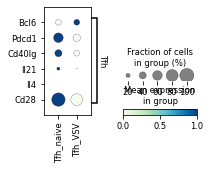

In [10]:
sc.pl.dotplot(bdata, 
              {'Tfh':['Bcl6', 'Pdcd1', 'Cd40lg', 'Il21', 'Il4', 'Cd28'],
              },
              groupby = 'celltype_condition', 
              color_map = 'GnBu',
              standard_scale = 'var',
              var_group_rotation = 0,
              figsize = (2.75,1.5),
              # save = '/gc_b_t_markers_revision.pdf',
              swap_axes = True)

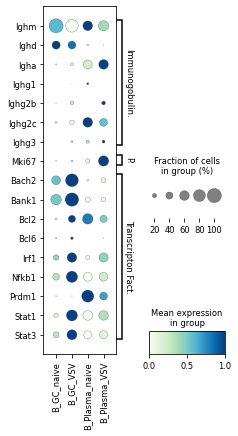

In [46]:
sc.pl.dotplot(bdata[bdata.obs['celltype'].isin(['B_GC', 'B_Plasma'])], 
              {
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3'],
               'Proliferation':['Mki67',],
               'Transcripton Factors':['Bach2', 'Bank1', 'Bcl2', 'Bcl6', 'Irf1', 'Nfkb1', 'Prdm1', 'Stat1', 'Stat3', ],
              },
              groupby = 'celltype_condition', 
              color_map = 'GnBu',
              standard_scale = 'var',
              var_group_rotation = 180,
              save = '/gc_b_t_markers_revision_split_antibody.pdf',
              figsize = (3.25,6),
              swap_axes = True)

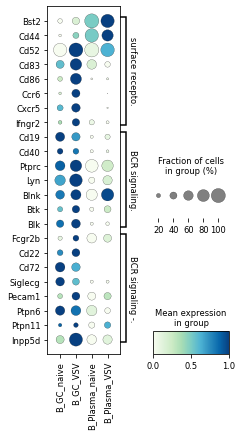

In [45]:
sc.pl.dotplot(bdata[bdata.obs['celltype'].isin(['B_GC', 'B_Plasma'])], 
              {
               'surface receptors':[
                   'Bst2',
                   'Cd44',
                   'Cd52',
                   'Cd83',
                   'Cd86',
                   'Ccr6',
                   'Cxcr5',
                   'Ifngr2',
               ],
               'BCR signaling - activation':['Cd19','Cd40', 'Ptprc', 'Lyn','Blnk', 'Btk', 'Blk'],
               'BCR signaling - inhibitory':['Fcgr2b', 'Cd22', 'Cd72', 'Siglecg', 'Pecam1', 'Ptpn6', 'Ptpn11', 'Inpp5d'],
              },
              groupby = 'celltype_condition', 
              color_map = 'GnBu',
              standard_scale = 'var',
              var_group_rotation = 180,
              save = '/gc_b_t_markers_revision_split_surface.pdf',
              figsize = (3.25,6),
              swap_axes = True)

In [55]:
adata

AnnData object with n_obs × n_vars = 10839 × 3266
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'condition_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'keep_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'dist

In [56]:
bdata

AnnData object with n_obs × n_vars = 812 × 3845
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep', 'celltype_condition'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'condition_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'keep_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'co

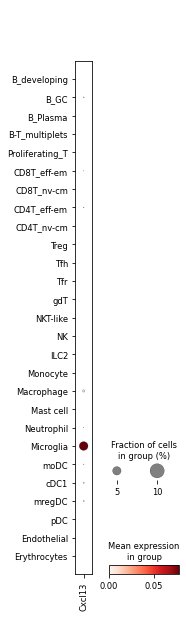

In [59]:
sc.pl.dotplot(adata, ['Cxcl13'], groupby = 'celltype')